In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
import gc
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [2]:
df= pd.read_csv('C:\\Users\\Tati\\source\\repos\\data_full.csv')
df

,Unnamed: 0,username,hours,products,product_id,text,Polarity,Calif,URL_NAME
0,0,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...,0.000000,1,Batman_Arkham_Asylum_Game_of_the_Year_Edition
1,1,Duha Nubie,11.3,73.0,35140,first debut feel sweet,0.800000,3,Batman_Arkham_Asylum_Game_of_the_Year_Edition
2,2,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...,0.075000,1,Batman_Arkham_Asylum_Game_of_the_Year_Edition
3,3,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...,-0.017647,1,Shadows_of_Adam
4,4,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...,0.000000,1,Batman_Arkham_Asylum_Game_of_the_Year_Edition
...,...,...,...,...,...,...,...,...,...
2313119,2313119,LostWhispers,92.1,150.0,252490,WARNING!! you will burn way to many hours in ...,NaN,2,Rust
2313120,2313120,Rick Sanchez C-132,63.0,37.0,252490,This game is already one of the most fun and i...,NaN,2,Rust
2313121,2313121,Crit_Magnet_,16.0,192.0,252490,"So much fun, once you get set up!",NaN,2,Rust
2313122,2313122,worldoftanks,82.2,91.0,252490,O yes good waiting long time,NaN,2,Rust


In [3]:
reader=Reader()

In [4]:
data=Dataset.load_from_df(df[['username','product_id','Calif']],reader=reader)

In [5]:
trainset,testset=train_test_split(data,test_size=.3)

In [6]:
algo=SVD()

In [7]:
algo.fit(trainset)

In [8]:
prediction=algo.test(testset)
prediction

[Prediction(uid='Ylthan', iid=271590, r_ui=1.0, est=1.5911642588095667, details={'was_impossible': False}),
 Prediction(uid='ExSaiga', iid=287290, r_ui=2.0, est=1.9993942208322297, details={'was_impossible': False}),
 Prediction(uid='Sqwitters', iid=259060, r_ui=1.0, est=2.0314112154821413, details={'was_impossible': False}),
 Prediction(uid='The Happiest Banana', iid=248610, r_ui=1.0, est=1.5338361209135931, details={'was_impossible': False}),
 Prediction(uid='EnergizedUraniun', iid=205100, r_ui=2.0, est=1.9308260075386074, details={'was_impossible': False}),
 Prediction(uid='nart', iid=49520, r_ui=2.0, est=1.9344952799515742, details={'was_impossible': False}),
 Prediction(uid='SpankMyBalls', iid=224260, r_ui=2.0, est=2.0873414741046132, details={'was_impossible': False}),
 Prediction(uid='SPOOK crawling out of my asshole', iid=363970, r_ui=2.0, est=1.9984951660617067, details={'was_impossible': False}),
 Prediction(uid='Flexicution', iid=440, r_ui=2.0, est=2.0022076671092575, detail

In [9]:
usuario='Alex'

In [27]:
data_review_filtered = df[df["username"]!=usuario]
data_reviews_ok=data_review_filtered.loc[:,['URL_NAME', 'product_id']]
data_reviews_ok.drop_duplicates(subset=['product_id'], inplace=True)
data_reviews_ok
#data_reviews_ok.count()
#data_reviews_ok[data_reviews_ok.URL_NAME.isna()]

,URL_NAME,product_id
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140
3,Shadows_of_Adam,506510
5,LawBreakers,350280
6,Witchinour,620900
8,Recourse_Demo,431320
...,...,...
2204730,Air_Tactical,673760
2204743,Guards,460340
2204783,XIII_Century__Gold_Edition,34420
2205194,Crispy_Chicken,546380


In [29]:
data_reviews_ok.reset_index(drop=True,inplace=True)
data_reviews_ok

,URL_NAME,product_id
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140
1,Shadows_of_Adam,506510
2,LawBreakers,350280
3,Witchinour,620900
4,Recourse_Demo,431320
...,...,...
9733,Air_Tactical,673760
9734,Guards,460340
9735,XIII_Century__Gold_Edition,34420
9736,Crispy_Chicken,546380


In [30]:
data_reviews_ok['Score_model']=data_reviews_ok['product_id'].apply(lambda x: algo.predict(usuario,x).est)

In [31]:
data_reviews_ok

,URL_NAME,product_id,Score_model
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140,1.777326
1,Shadows_of_Adam,506510,2.243148
2,LawBreakers,350280,1.968378
3,Witchinour,620900,2.110111
4,Recourse_Demo,431320,1.876609
...,...,...,...
9733,Air_Tactical,673760,1.853421
9734,Guards,460340,2.144850
9735,XIII_Century__Gold_Edition,34420,1.992077
9736,Crispy_Chicken,546380,1.951990


In [32]:
accuracy.rmse(prediction)

RMSE: 0.5556


0.5556028703149616

In [33]:
rmse_test_means = []
factores = [1,2,4,8,16,32]

for factor in factores:
    print(f'\nNúmero de Factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))


Número de Factores: 1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5451  0.5442  0.5448  0.5447  0.0004  
Fit time          23.68   24.23   24.51   24.14   0.34    
Test time         5.83    5.73    6.15    5.90    0.18    

Número de Factores: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5446  0.5445  0.5458  0.5449  0.0006  
Fit time          26.43   21.80   20.65   22.96   2.50    
Test time         5.82    3.81    4.77    4.80    0.82    

Número de Factores: 4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5460  0.5446  0.5450  0.5452  0.0006  
Fit time          21.93   21.80   21.99   21.91   0.08    
Test time         4.89    4.84    4.83    4.85    0.02    

Número de Factores: 8
Evaluating RMSE of algorithm SVD on 3 split(s).

    

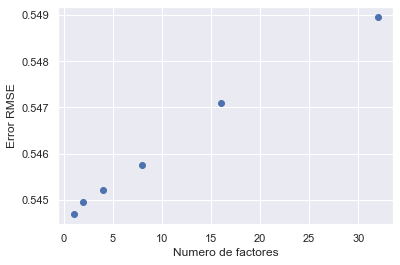

In [34]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [35]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)

In [ ]:
gs.fit(data)

In [ ]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])